# HCT Survival Predictions

Goal:  Develop models to improve the prediction of transplant survival rates for patients undergoing allogeneic Hematopoietic Cell Transplantation (HCT) — an important step in ensuring that every patient has a fair chance at a successful outcome, regardless of their background.

Improving survival predictions for allogeneic HCT patients is a vital healthcare challenge. Current predictive models often fall short in addressing disparities related to socioeconomic status, race, and geography. Addressing these gaps is crucial for enhancing patient care, optimizing resource utilization, and rebuilding trust in the healthcare system.

The goal is to address disparities by bridging diverse data sources, refining algorithms, and reducing biases to ensure equitable outcomes for patients across diverse race groups. Your work will help create a more just and effective healthcare environment, ensuring every patient receives the care they deserve.

Dataset Description

The dataset consists of 59 variables related to hematopoietic stem cell transplantation (HSCT), encompassing a range of demographic and medical characteristics of both recipients and donors, such as age, sex, ethnicity, disease status, and treatment details. The primary outcome of interest is event-free survival, represented by the variable efs, while the time to event-free survival is captured by the variable efs_time. These two variables together encode the target for a censored time-to-event analysis. The data, which features equal representation across recipient racial categories including White, Asian, African-American, Native American, Pacific Islander, and More than One Race, was synthetically generated using the data generator from synthcity, trained on a large cohort of real CIBMTR data.


    train.csv - the training set, with target efs (Event-free survival)
    test.csv - the test set; your task is to predict the value of efs for this data
    sample_submission.csv - a sample submission file in the correct format with all predictions set to 0.50
    data_dictionary.csv - a list of all features and targets used in dataset and their descriptions


## Import Package

In [34]:
import numpy as np
import pandas as pd

## Import Dataset

In [35]:
path_data_dictionary = "C:/Users/julia/Desktop/Yanjun/hct competition/data_dictionary.csv"
path_test = "C:/Users/julia/Desktop/Yanjun/hct competition/test.csv"
path_train = "C:/Users/julia/Desktop/Yanjun/hct competition/train.csv"
data_dictionary = pd.read_csv(path_data_dictionary)
path_submission = "C:/Users/julia/Desktop/Yanjun/hct competition/sample_submission.csv"
test = pd.read_csv(path_test)
train = pd.read_csv(path_train)
submission = pd.read_csv(path_submission)

In [36]:
train.dri_score.value_counts()

dri_score
Intermediate                                         10436
N/A - pediatric                                       4779
High                                                  4701
N/A - non-malignant indication                        2427
TBD cytogenetics                                      2003
Low                                                   1926
High - TED AML case <missing cytogenetics             1414
Intermediate - TED AML case <missing cytogenetics      481
N/A - disease not classifiable                         272
Very high                                              198
Missing disease status                                   9
Name: count, dtype: int64

In [37]:
data_dictionary

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [39]:
# remove Id from train
train1 = train.copy()
train1 = train1.drop(columns = 'ID')

In [40]:
train1.efs.value_counts('percent')

# efs = 1 means that this patient has Event after transplant surgery
# efs = 0 means that this patient doesn't has Event after transplant surgery

efs
1.0    0.539306
0.0    0.460694
Name: proportion, dtype: float64

In [41]:
train1.head()

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [42]:
test

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


## Analyse of the Data

### Check the proposition of missing data

In [43]:
missing = np.round(train1.isna().sum()/len(train), 3) * 100
missing

dri_score                  0.5
psych_disturb              7.2
cyto_score                28.0
diabetes                   7.4
hla_match_c_high          16.0
hla_high_res_8            20.2
tbi_status                 0.0
arrhythmia                 7.6
hla_low_res_6             11.4
graft_type                 0.0
vent_hist                  0.9
renal_issue                6.6
pulm_severe                7.4
prim_disease_hct           0.0
hla_high_res_6            18.3
cmv_status                 2.2
hla_high_res_10           24.9
hla_match_dqb1_high       18.1
tce_imm_match             38.7
hla_nmdp_6                14.6
hla_match_c_low            9.7
rituximab                  7.5
hla_match_drb1_low         9.2
hla_match_dqb1_low        14.6
prod_type                  0.0
cyto_score_detail         41.4
conditioning_intensity    16.6
ethnicity                  2.0
year_hct                   0.0
obesity                    6.1
mrd_hct                   57.6
in_vivo_tcd                0.8
tce_matc

In [44]:
df_missing = pd.DataFrame(missing, columns=['values']).reset_index()

In [45]:
# mark different variables which has different category of missing data percentage:

# function to differentiate different category percentage of missing data
def color_map(percent):
  cmap = []
  for x in percent:
    if x >= 20:
      temp = 'background-color: red'
    elif x >= 5:
      temp = 'background-color: yellow'
    else:
      temp = 'background-color: green'
    cmap.append(temp)
  return cmap
# df_missing.style.map(color_map)
df_missing.style.apply(lambda x: color_map(df_missing['values']), subset= ['index','values'], axis = 0)

,index,values
0,dri_score,0.500000
1,psych_disturb,7.200000
2,cyto_score,28.000000
3,diabetes,7.400000
4,hla_match_c_high,16.000000
5,hla_high_res_8,20.200000
6,tbi_status,0.000000
7,arrhythmia,7.600000
8,hla_low_res_6,11.400000
9,graft_type,0.000000


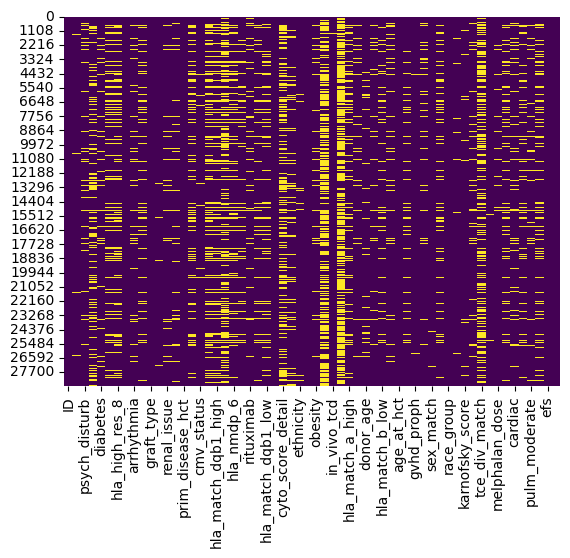

In [46]:
# visualizing the missing data using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(train.isnull(), cbar = False, cmap = 'viridis')
plt.show()

### 1.process missing data, 2.use dummy to transfer category variables to numerical variables, 3.deceide which features import to efs and efs_time 

In [47]:
# 1 find variables which has percentage of missing data less than 5%
indexless5 = np.where(missing < 5)
missingless5 = missing.index[indexless5]
print('variables which has percentage of missing data less than 5% :', missingless5)

# 2 find variables which has percentage of missing data 5% - 20%
index5to20 = np.where((missing>= 5) & (missing < 20))
missing5to20 = missing.index[index5to20]
print('variables which has percentage of missing data 5% - 20%: ', missing5to20)

# 3 find variables which has percentage of missing data  more than 20%
index20 = np.where((missing>= 20))
missing20 = missing.index[index20]
print('variables which has percentage of missing data more than 20% :', missing20)


variables which has percentage of missing data less than 5% : Index(['dri_score', 'tbi_status', 'graft_type', 'vent_hist',
       'prim_disease_hct', 'cmv_status', 'prod_type', 'ethnicity', 'year_hct',
       'in_vivo_tcd', 'age_at_hct', 'gvhd_proph', 'sex_match', 'race_group',
       'comorbidity_score', 'karnofsky_score', 'donor_related',
       'melphalan_dose', 'efs', 'efs_time'],
      dtype='object')
variables which has percentage of missing data 5% - 20%:  Index(['psych_disturb', 'diabetes', 'hla_match_c_high', 'arrhythmia',
       'hla_low_res_6', 'renal_issue', 'pulm_severe', 'hla_high_res_6',
       'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab',
       'hla_match_drb1_low', 'hla_match_dqb1_low', 'conditioning_intensity',
       'obesity', 'hla_match_a_high', 'hepatic_severe', 'donor_age',
       'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'hla_match_a_low',
       'rheum_issue', 'hla_match_b_high', 'hepatic_mild', 'hla_low_res_8',
       'cardiac',

In [48]:
# replace missing data in variables which has less than 5 % of missing data with mode or mean 
misssing_less5_object = train1.loc[:, missingless5].select_dtypes(include = 'object').columns
for col in misssing_less5_object:
  train1[col] = train1[col].fillna(train1[col].mode()[0])

misssing_less5_numerical = train1.loc[:, missingless5].select_dtypes(exclude = 'object').columns
for col in misssing_less5_numerical:
  train1[col] = train1[col].fillna(train1[col].mean())

train1[missingless5].isnull().sum()
# check weather there are missing data ln variables which has less than 5 percentage of missing data originally 

dri_score            0
tbi_status           0
graft_type           0
vent_hist            0
prim_disease_hct     0
cmv_status           0
prod_type            0
ethnicity            0
year_hct             0
in_vivo_tcd          0
age_at_hct           0
gvhd_proph           0
sex_match            0
race_group           0
comorbidity_score    0
karnofsky_score      0
donor_related        0
melphalan_dose       0
efs                  0
efs_time             0
dtype: int64

In [49]:
# train12 = train1.copy()

In [50]:
# # for variables which has 5% to 20% of missing data, create a missing indicator
# for col in missing5to20:
#   train12[col +'_missing'] = train1[col].isnull().astype(int)

In [51]:
# Use Cox Proportional Hazards Model to determine whether the missing data has an impact on survival
from lifelines import CoxPHFitter

In [52]:
# # Penalized Cox models, such as Ridge or Lasso regression, can help mitigate issues caused by collinearity and missing data. In lifelines, you can use the penalizer argument to apply regularization to the Cox model.
# cph = CoxPHFitter(penalizer=0.1)
# # use new data train2 (which is train1 remove missing20)
# train2 = train12.copy()
# train2 = train2.drop(columns = missing20)

# # replace category nan with missing, and replace numerical nan with median 
# object_columns = train2.select_dtypes(include = object).columns
# train2[object_columns]= train2.select_dtypes(include = object).fillna('Missing')

# numerical_columns = train2.select_dtypes(exclude = object).columns
# train2[numerical_columns] = train2[numerical_columns].fillna(train2[numerical_columns].median())

# # because Cox Proportional Hazards Model only cope with numerical variables, so change category to numerical(get_dummies)
# train2 = pd.get_dummies(train2, drop_first= True, dtype = int)
# # remove gvhd_proph_FK+- others(not MMF,MTX) this columns in train2, because this columns all have the same value
# train2 = train2.drop(columns = ['gvhd_proph_FK+- others(not MMF,MTX)'])

# # standardize train2, train2 chnage to train
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# train2 = train2.astype(float)
# train2.iloc[:,:] = std.fit_transform(train2.iloc[:,:])

In [53]:
# # use train2 to fit the model 
# cph.fit(train2, duration_col= 'efs_time', event_col= 'efs')
# cph.print_summary()
# # the result of the model is moderate , beacuse the C- index is 0.62, so it need to improve the data quality

###### group variables with missing data less than 5% and more than 5%

In [54]:
# 1 find variables which has percentage of missing data more than 5%
indexmore5 = np.where(missing>= 5)
missingmore5 = missing.index[indexmore5]
print('variables which has percentage of missing data more than 5%: ', missingmore5)

variables which has percentage of missing data more than 5%:  Index(['psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high',
       'hla_high_res_8', 'arrhythmia', 'hla_low_res_6', 'renal_issue',
       'pulm_severe', 'hla_high_res_6', 'hla_high_res_10',
       'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low',
       'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low',
       'cyto_score_detail', 'conditioning_intensity', 'obesity', 'mrd_hct',
       'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age',
       'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'hla_match_a_low',
       'rheum_issue', 'hla_match_b_high', 'hepatic_mild', 'tce_div_match',
       'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate',
       'hla_low_res_10'],
      dtype='object')


In [55]:
traintemp = train1.copy()

In [56]:
# for variables which has more than 5% of missing data, create a missing indicator
for col in missingmore5:
  traintemp[col +'_missing'] = train1[col].isnull().astype(int)

In [57]:
# Penalized Cox models, such as Ridge or Lasso regression, can help mitigate issues caused by collinearity and missing data. In lifelines, you can use the penalizer argument to apply regularization to the Cox model.
cph = CoxPHFitter(penalizer=0.1)
# use new data train2 (which is train1 remove missing20)
train3 = traintemp.copy()

# replace category nan with missing, and replace numerical nan with median 
object_columns = train3.select_dtypes(include = object).columns
train3[object_columns]= train3.select_dtypes(include = object).fillna('Missing')

numerical_columns = train3.select_dtypes(exclude = object).columns
train3[numerical_columns] = train3[numerical_columns].fillna(train3[numerical_columns].median())

# because Cox Proportional Hazards Model only cope with numerical variables, so change category to numerical(get_dummies)
train3 = pd.get_dummies(train3, drop_first= True, dtype = int)
# remove gvhd_proph_FK+- others(not MMF,MTX) this columns in train3, because this columns all have the same value
train3 = train3.drop(columns = ['gvhd_proph_FK+- others(not MMF,MTX)'])

# standardize train3, train3 chnage to train
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train3 = train3.astype(float)
train3.iloc[:,:] = std.fit_transform(train3.iloc[:,:])

In [58]:
# use train3 to fit the model 
cph.fit(train3, duration_col= 'efs_time', event_col= 'efs')
cph.print_summary()
# the result of the model is moderate , beacuse the C- index is 0.63, so it need to improve the data quality

<lifelines.CoxPHFitter: fitted with 28800 total observations, 0 right-censored observations>
             duration col = 'efs_time'
                event col = 'efs'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 28800
number of events observed = 28800
   partial log-likelihood = -264228.13
         time fit was run = 2025-01-15 01:11:16 UTC

---
                                                             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                                    
hla_match_c_high                                             0.01      1.01      0.01           -0.01            0.03                0.99                1.03
hla_high_res_8                                              -0.01      0.99      0.02           -0.04            0.02                0.96                1.02
hla_low_res_6                                               -0.00      1.00      0.02           -0.03            0.03                0.97                1.03
hla_high_res_6                                              -0.00      1.00      0.02           -0.03            0.03                0.97                1.03
hla_high_res_10                                              0.00      1.00      0.01           -0.03            0.03                0.97                1.03
hla_match_dqb1_high                                          0.00      1.00      0.01           -0.01            0.02                0.99                1.02
hla_nmdp_6                                                  -0.02      0.98      0.01           -0.04           -0.00                0.96                1.00
hla_match_c_low                                             -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
hla_match_drb1_low                                           0.01      1.01      0.01           -0.01            0.03                0.99                1.03
hla_match_dqb1_low                                          -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
year_hct                                                     0.29      1.34      0.01            0.28            0.31                1.32                1.36
hla_match_a_high                                            -0.02      0.98      0.01           -0.04           -0.00                0.96                1.00
donor_age                                                    0.00      1.00      0.01           -0.01            0.02                0.99                1.02
hla_match_b_low                                              0.05      1.05      0.01            0.03            0.07                1.03                1.07
age_at_hct                                                   0.00      1.00      0.01           -0.01            0.02                0.99                1.02
hla_match_a_low                                             -0.03      0.97      0.01           -0.05           -0.01                0.95                0.99
hla_match_b_high                                             0.00      1.00      0.01           -0.02            0.02                0.98                1.02
comorbidity_score                                            0.09      1.09      0.01            0.08            0.10                1.08                1.11
karnofsky_score                                             -0.04      0.96      0.01           -0.05           -0.03                0.95                0.97
hla_low_res_8                                               -0.01      0.99      0.02           -0.04            0.02                0.96                1.02
hla_match_drb1_high                                          0.02      1.02      0.01         

### Plot all variables 

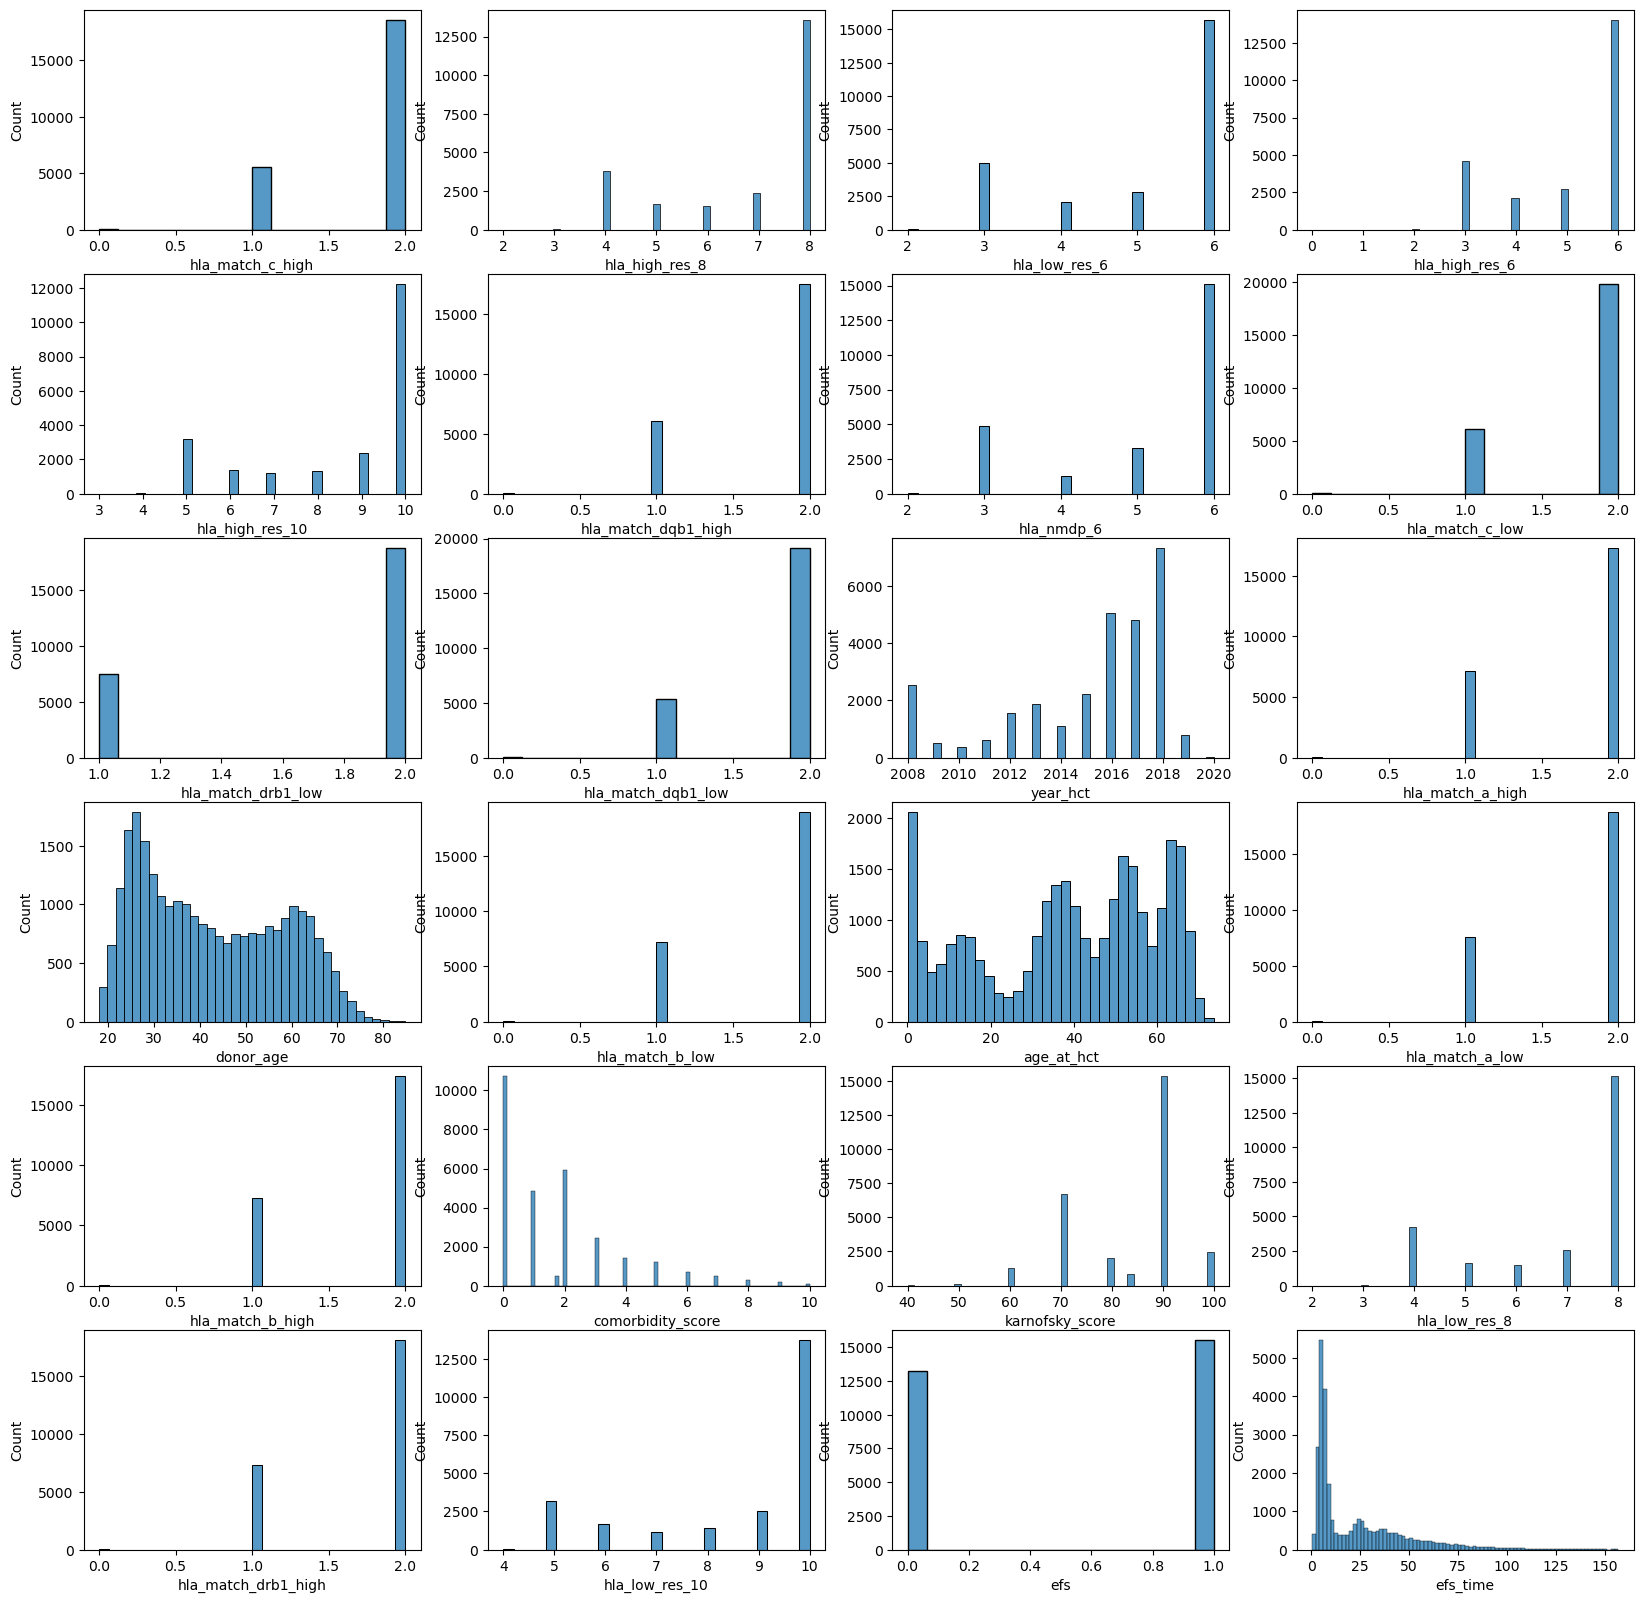

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# get numerical and object variables
numerical_variables = train1.select_dtypes(exclude = object).columns
object_variables = train1.select_dtypes(include = object).columns

num_numerical_variables = len(numerical_variables)
num_object = len(object_variables)

# plot the boxplot of all numerical variables 
fig, axes = plt.subplots(6, 4, figsize = (20, 20))
axes = axes.flatten()
for i, j in enumerate(numerical_variables):
  sns.histplot(data = train1, x = j, ax = axes[i])
plt.show()

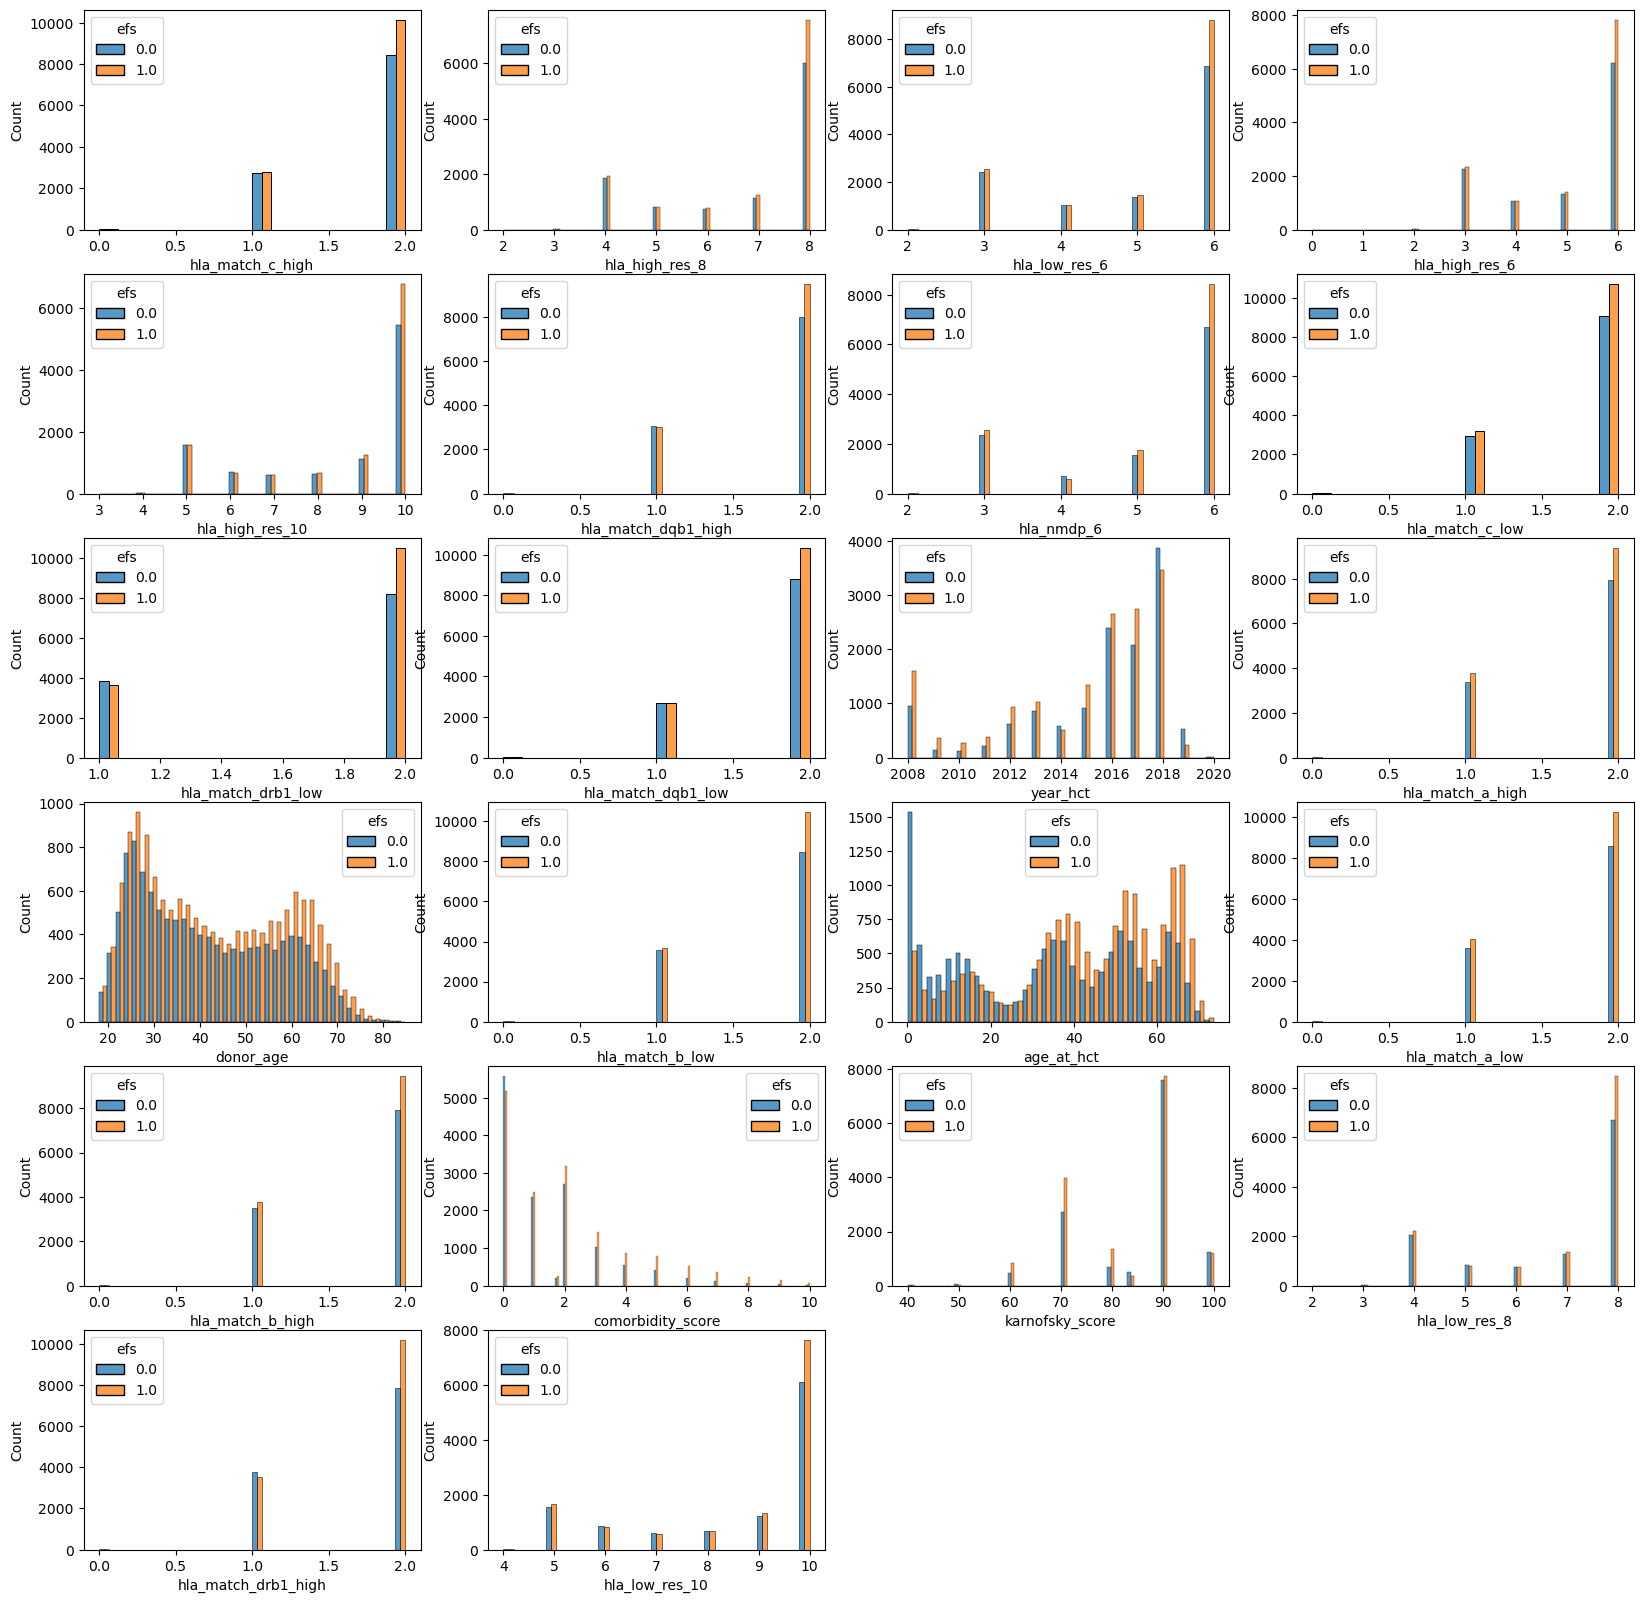

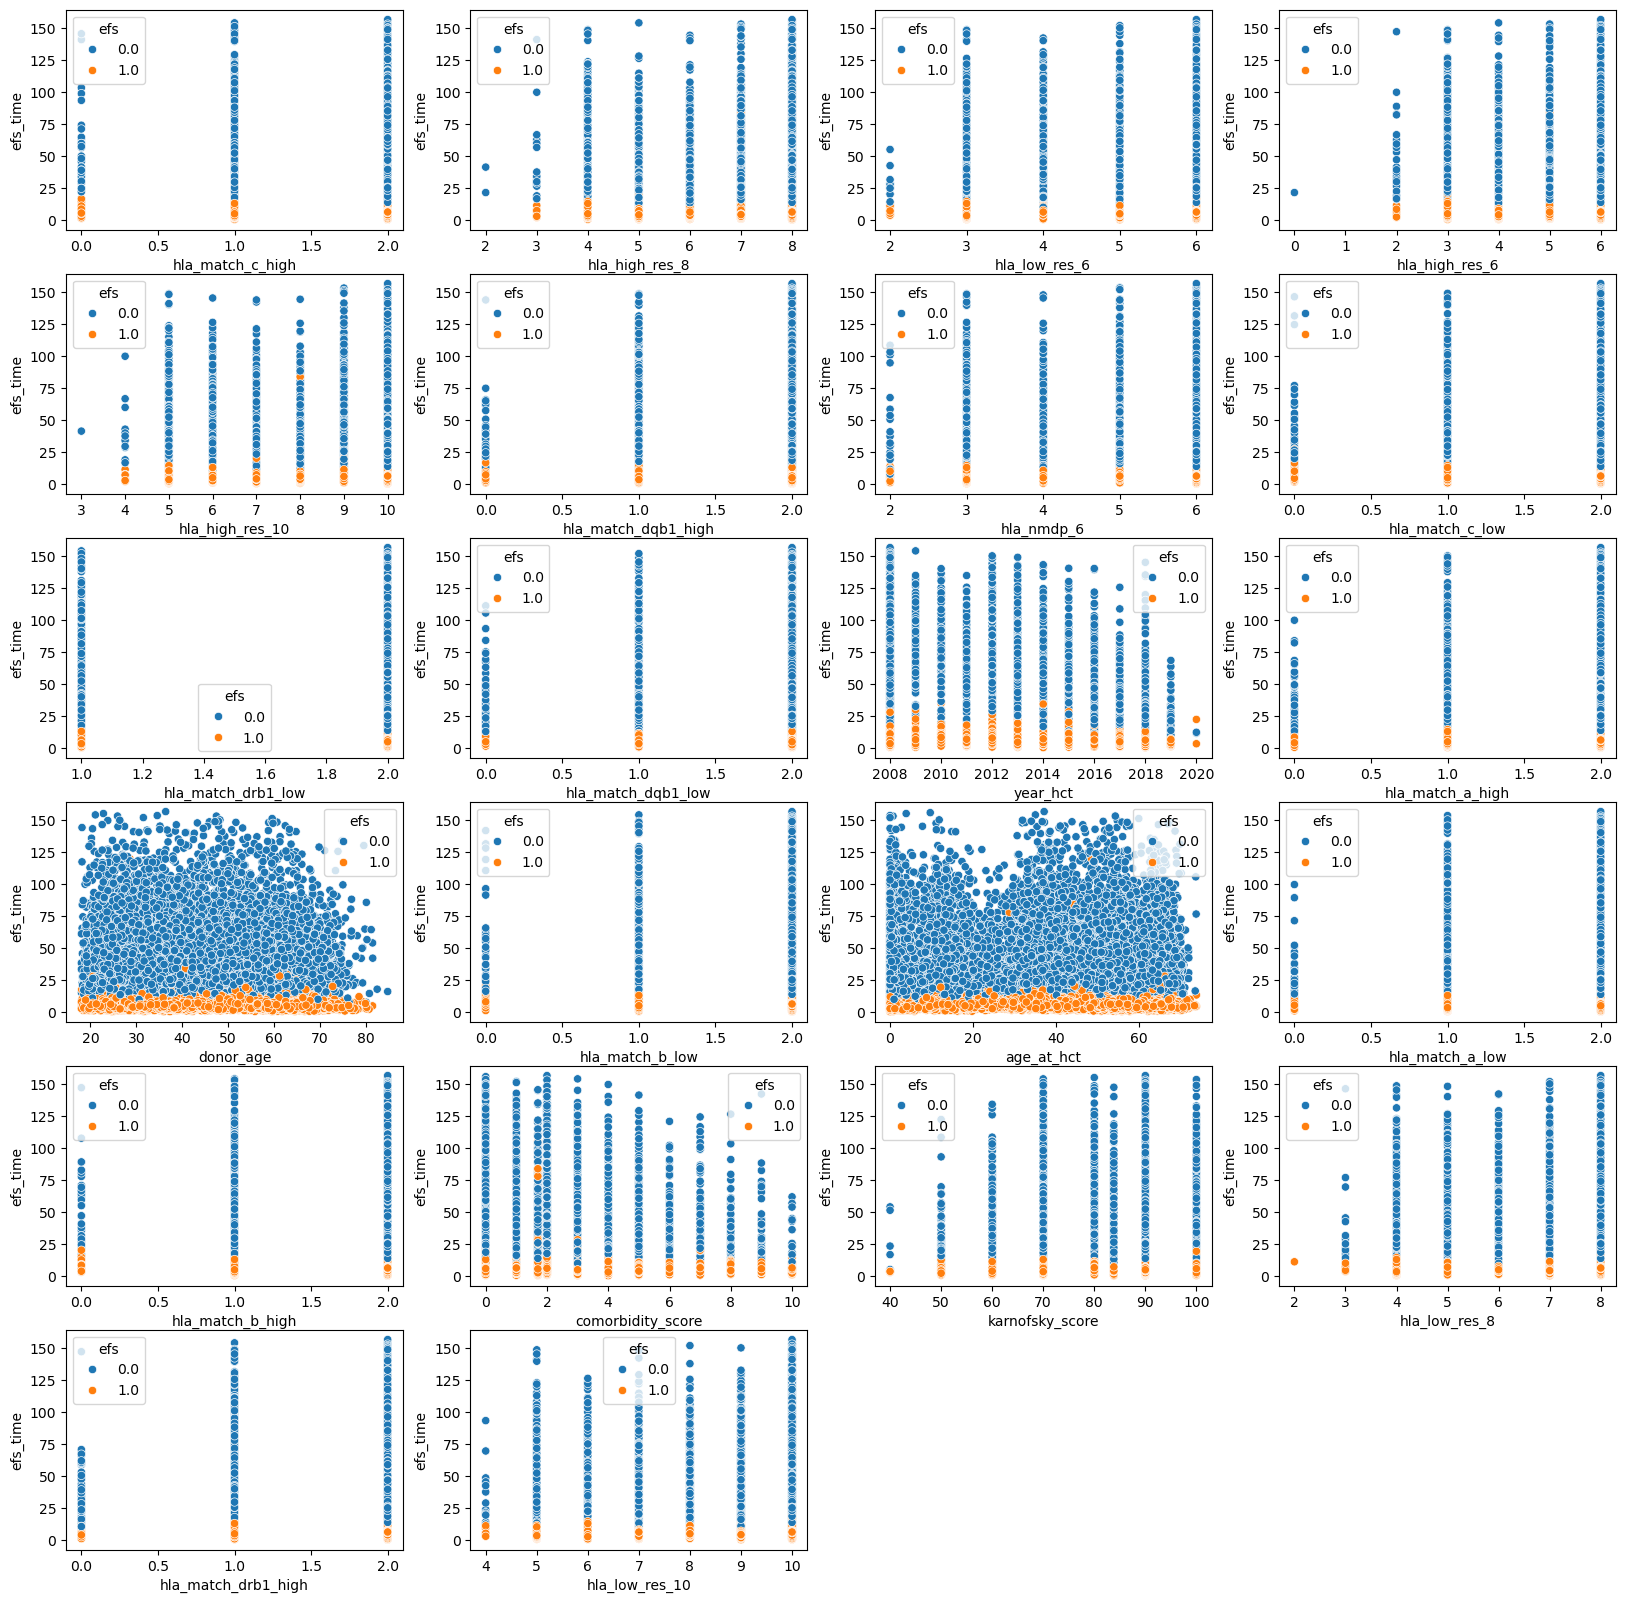

In [100]:
# plot the plot of all numerical variables vs efs
fig, axes = plt.subplots(6, 4, figsize = (20, 20))
axes = axes.flatten()
for i, j in enumerate(numerical_variables[0:-2]):
  sns.histplot(data = train1, x = j, hue = 'efs', multiple= 'dodge' , ax = axes[i])
for i in range(-2, 0):
  axes[i].axis('off')
plt.show()

# plot the plot of all numerical variables vs efs_time

fig, axes = plt.subplots(6, 4, figsize = (20, 20))
axes = axes.flatten()
for i, j in enumerate(numerical_variables[0:-2]):
  sns.scatterplot(data = train1, x = j, y = 'efs_time', hue = 'efs' , ax = axes[i])
for i in range(-2, 0):
  axes[i].axis('off')
plt.show()

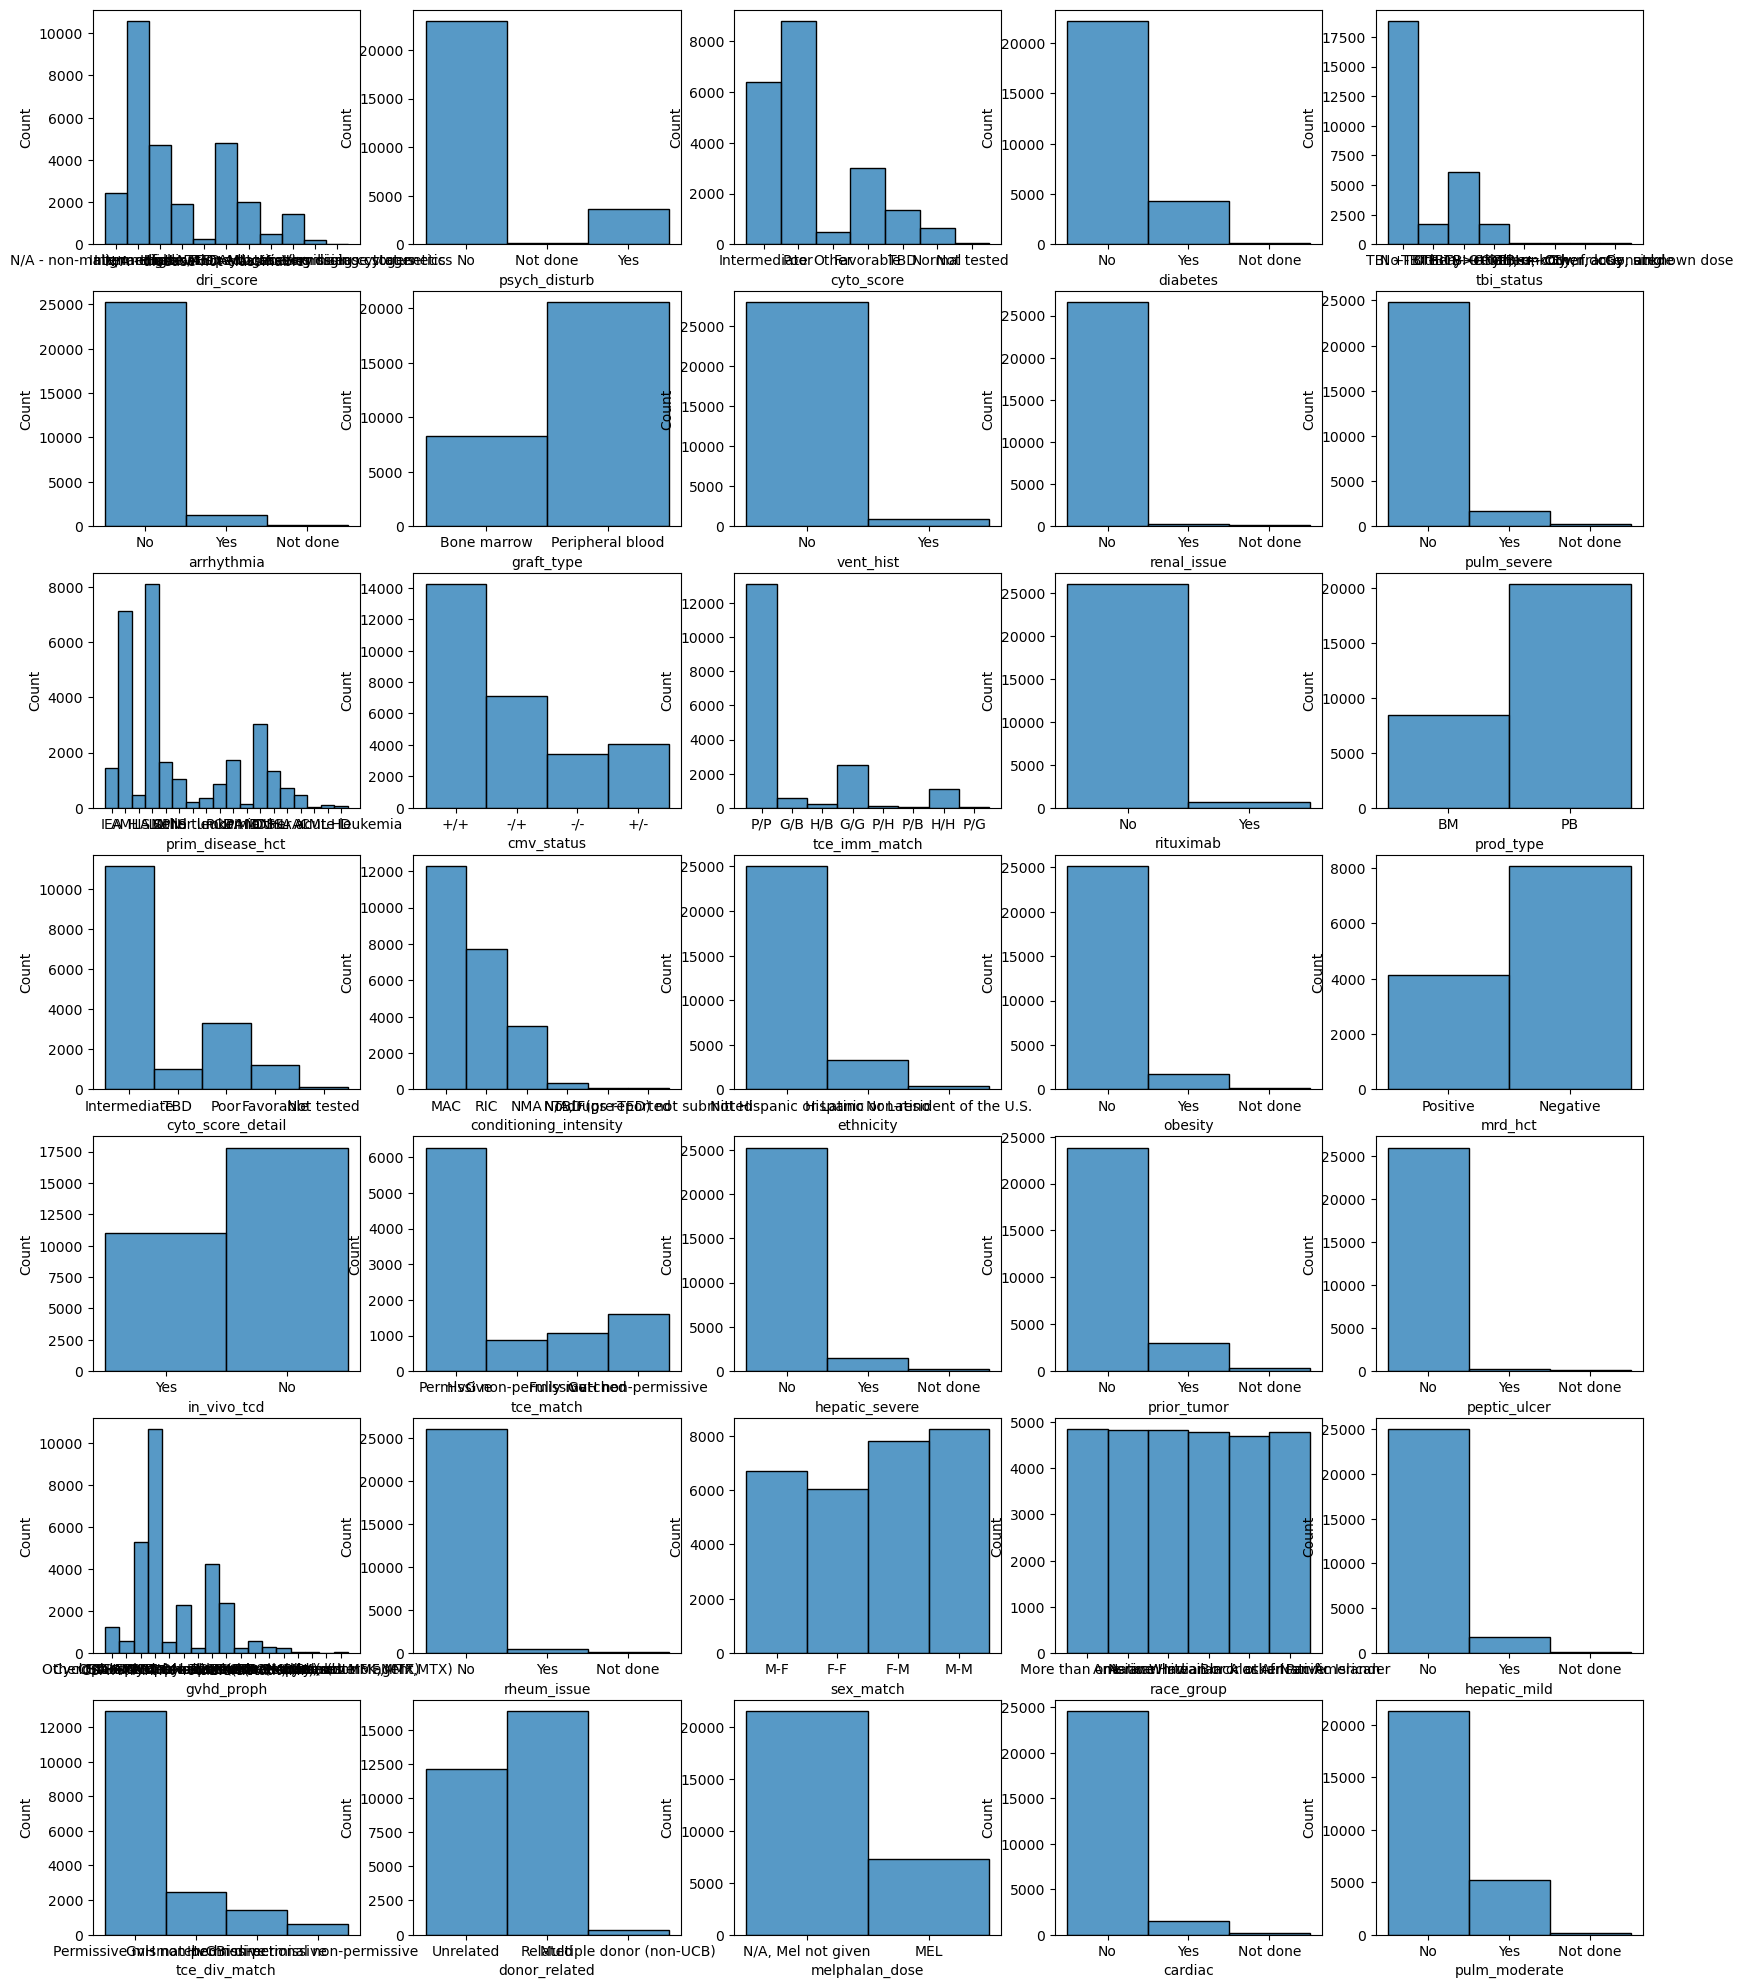

In [104]:
# check the plot of all category variables
fig, axes = plt.subplots(7, 5, figsize = (20, 25))
axes = axes.flatten()
for i, j in enumerate(object_variables):
  sns.histplot(data = train1, x = j, ax = axes[i])
plt.show()

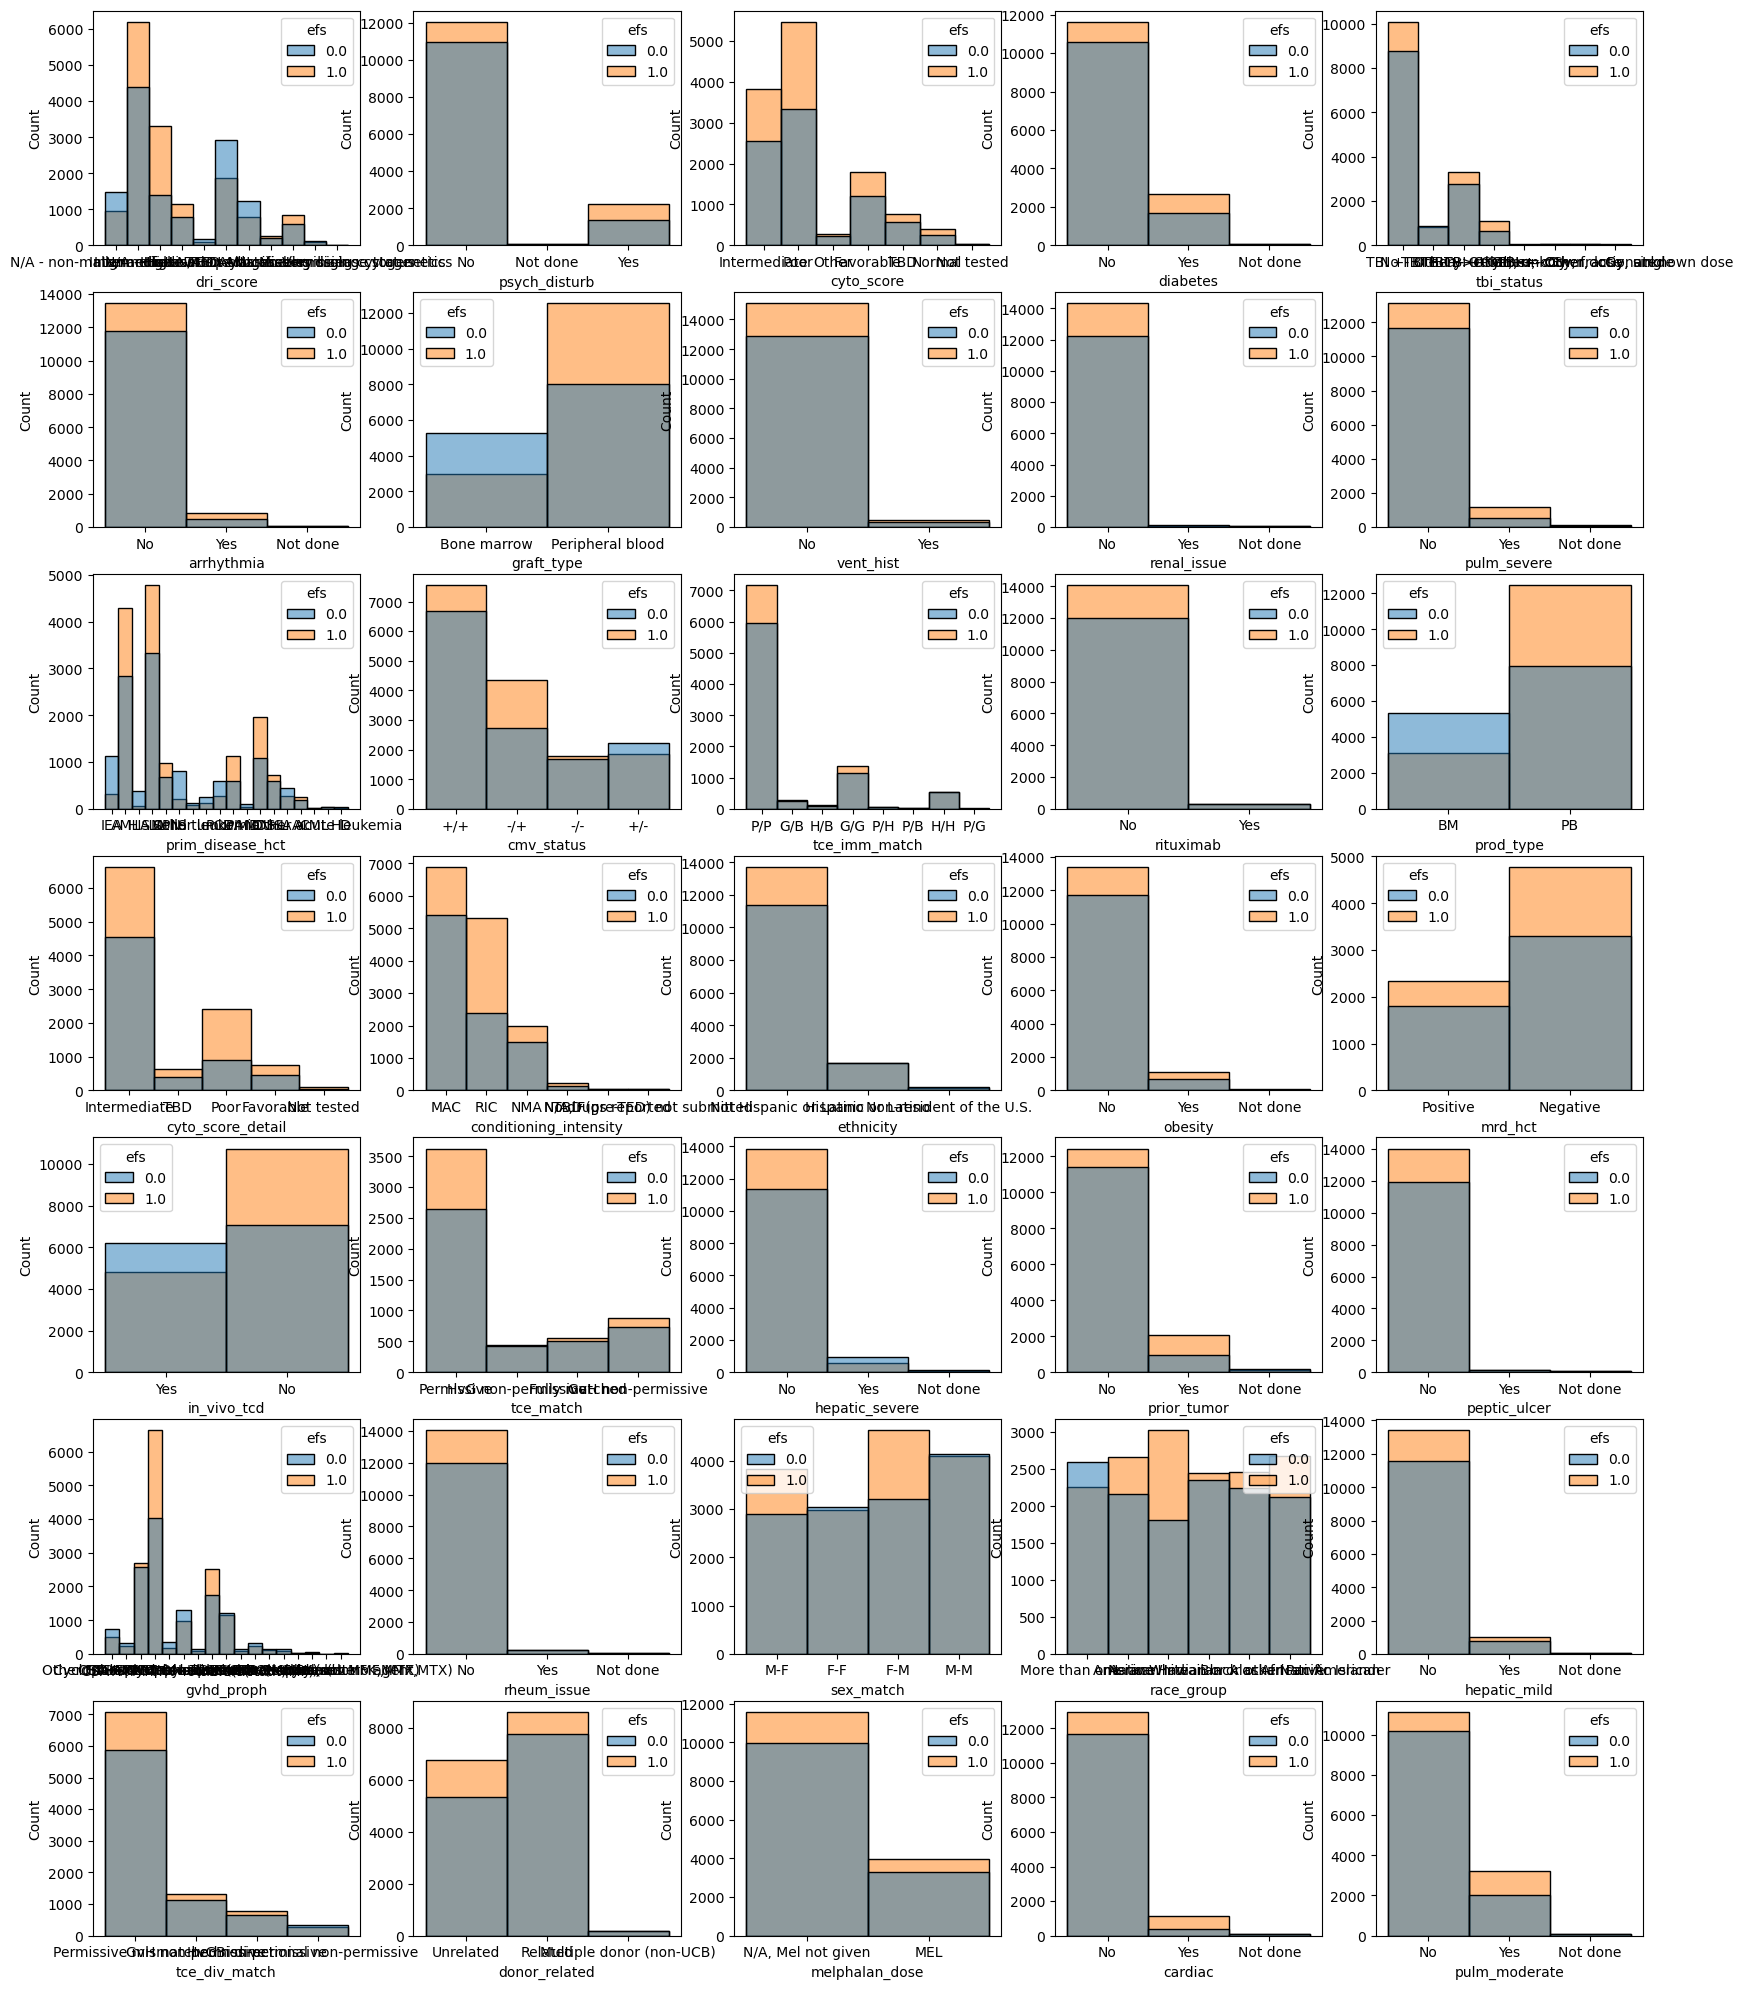

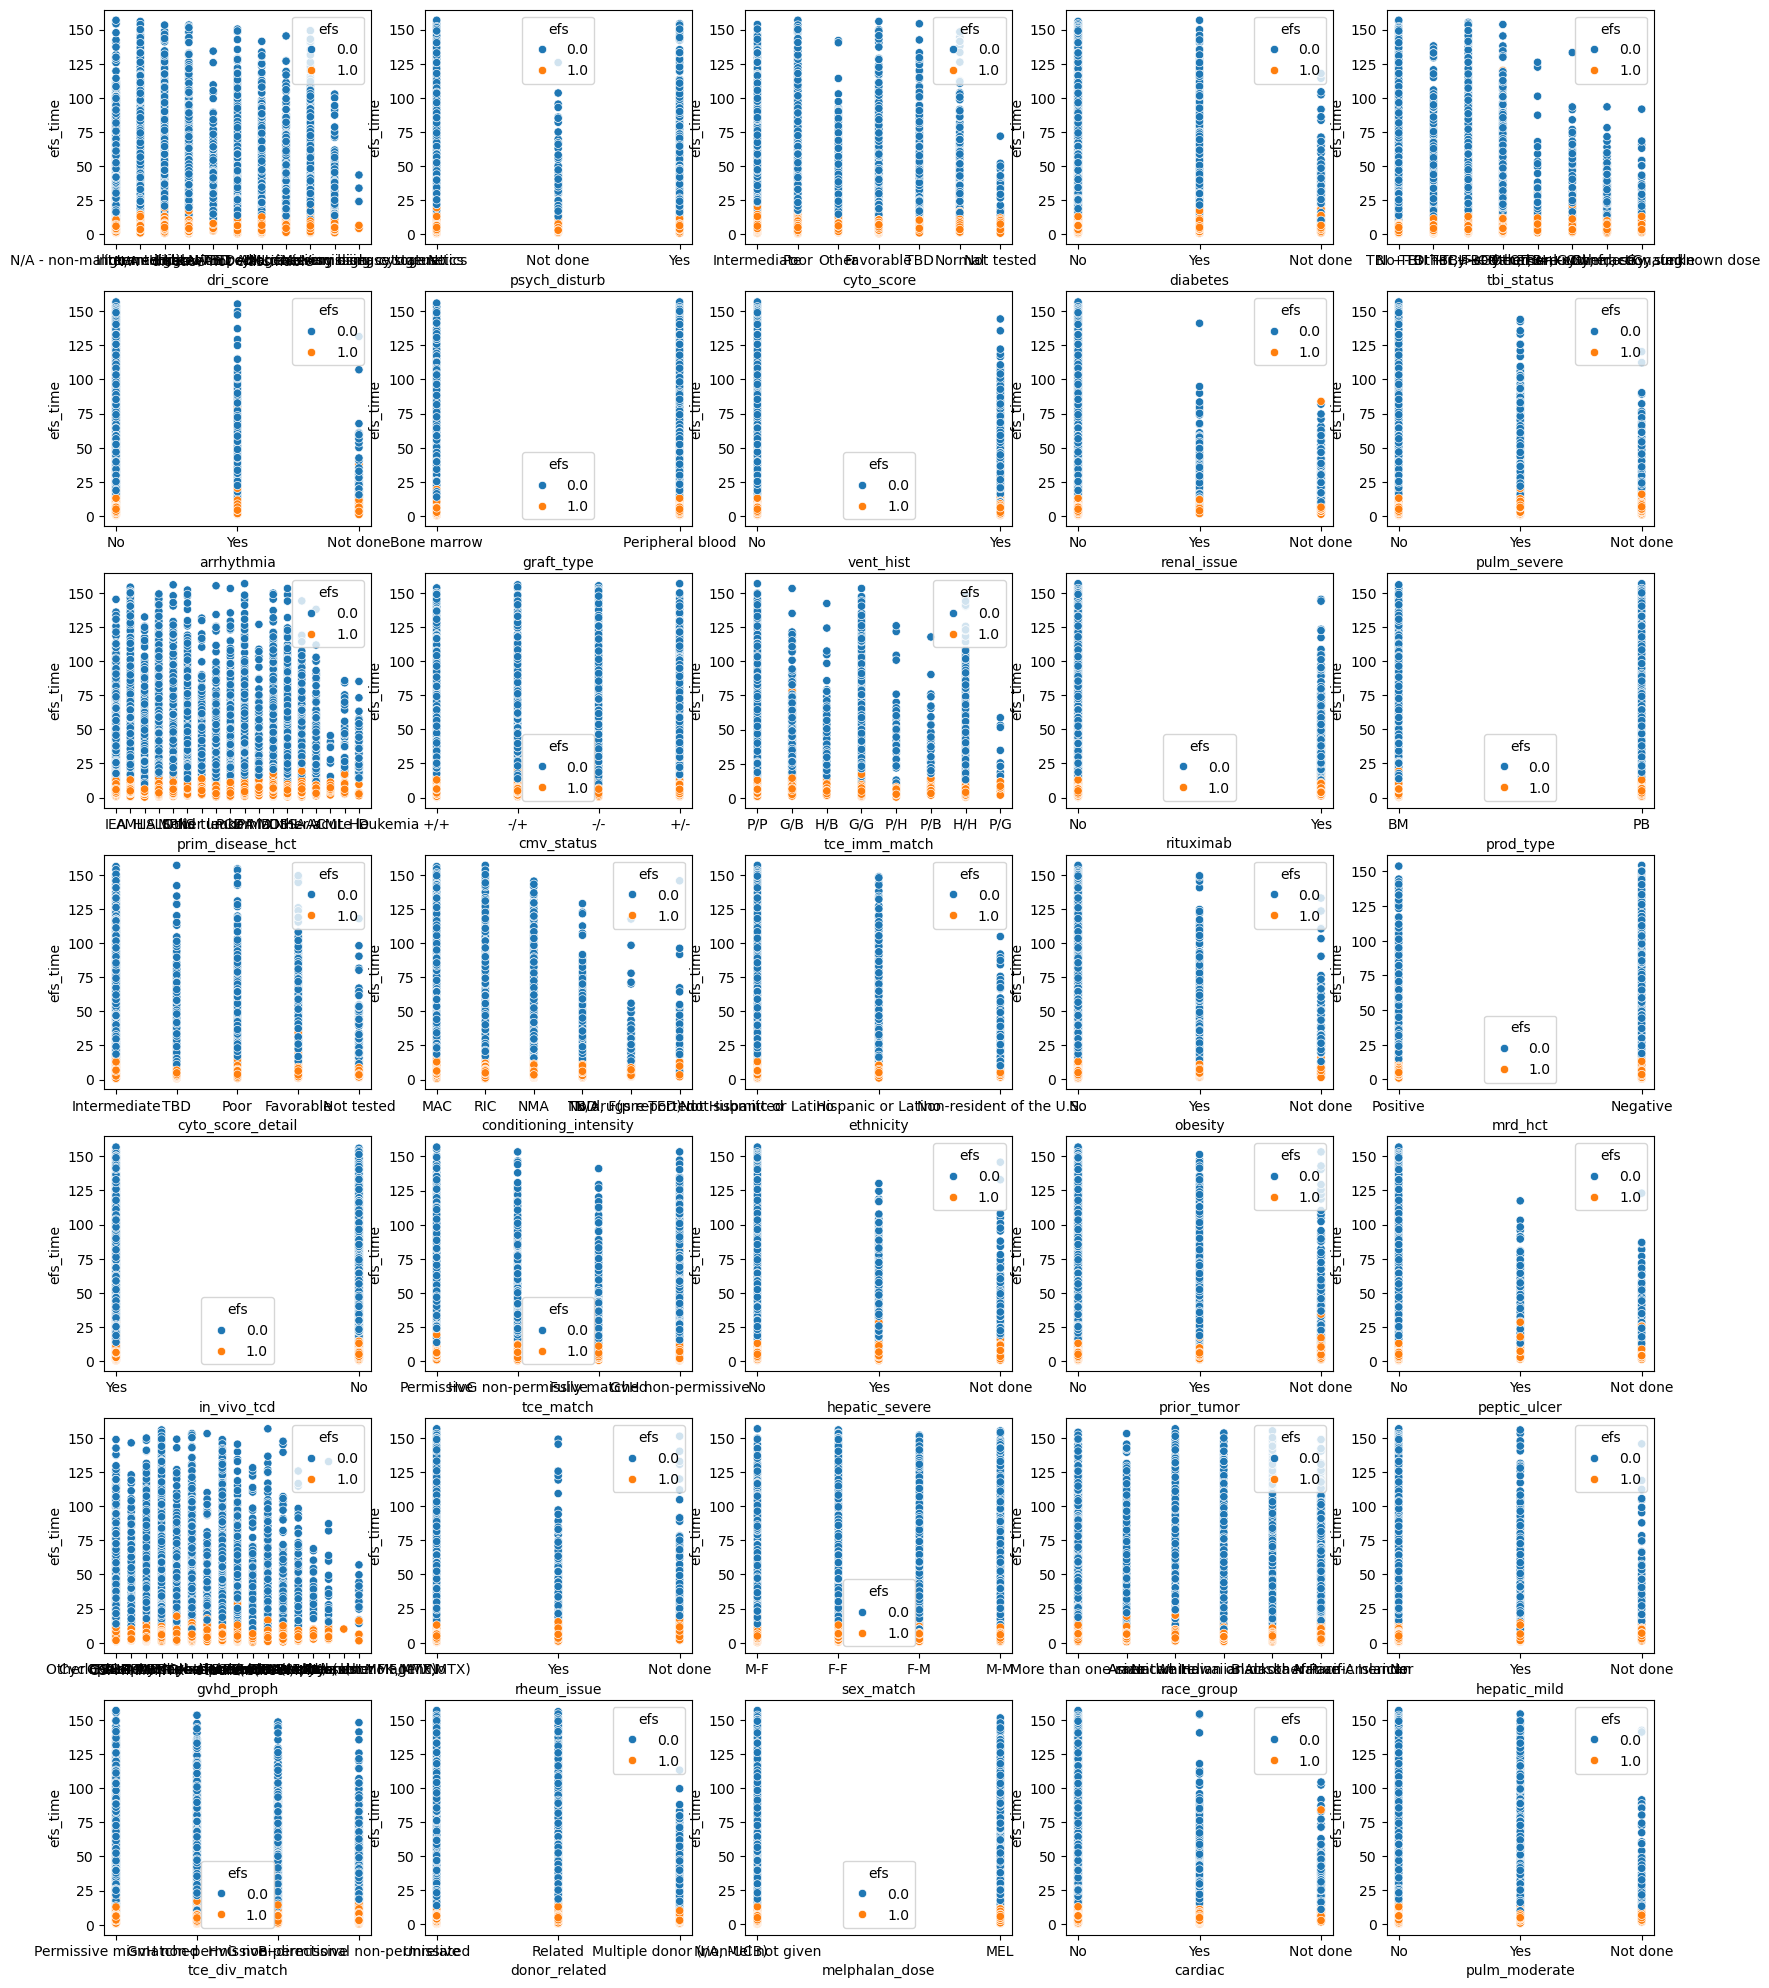

In [115]:
# check the plot of all category variables vs efs and efs_time

fig, axes = plt.subplots(7, 5, figsize = (20, 25))
axes = axes.flatten()
for i, j in enumerate(object_variables):
  sns.histplot(data = train1, x = j, hue = 'efs', ax = axes[i])
plt.show()


fig, axes = plt.subplots(7, 5, figsize = (20, 25))
axes = axes.flatten()
for i, j in enumerate(object_variables):
  sns.scatterplot(data = train1, x = j, y = 'efs_time', hue = 'efs', ax = axes[i])
plt.show()


#### We can see some variables with missing data are very important, so we are going to use random forests for survival to handle missing values directly

In [69]:
train1.isnull().mean().round(3)

dri_score                 0.000
psych_disturb             0.072
cyto_score                0.280
diabetes                  0.074
hla_match_c_high          0.160
hla_high_res_8            0.202
tbi_status                0.000
arrhythmia                0.076
hla_low_res_6             0.114
graft_type                0.000
vent_hist                 0.000
renal_issue               0.066
pulm_severe               0.074
prim_disease_hct          0.000
hla_high_res_6            0.183
cmv_status                0.000
hla_high_res_10           0.249
hla_match_dqb1_high       0.181
tce_imm_match             0.387
hla_nmdp_6                0.146
hla_match_c_low           0.097
rituximab                 0.075
hla_match_drb1_low        0.092
hla_match_dqb1_low        0.146
prod_type                 0.000
cyto_score_detail         0.414
conditioning_intensity    0.166
ethnicity                 0.000
year_hct                  0.000
obesity                   0.061
mrd_hct                   0.576
in_vivo_

In [ ]:
# use get_dummy to change category to numerical variables
train14 = train1.copy()
train14 = pd.get_dummies(train14, drop_first= True, dtype = float)

# split train14 into train4 and test4
from sklearn.model_selection import train_test_split
train4, test4 = train_test_split(train14, train_size= 0.7, random_state= 1, shuffle= True, stratify= train14['efs'])


,year_hct
3328,2018
27029,2016
10418,2015
4052,2012
11281,2008
...,...
26360,2011
22948,2008
1308,2014
8369,2017


In [153]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

# split X and y from train4
train4_X = train4.drop(columns= ['efs', 'efs_time'])
train4_y = train4['efs_time']
train4_r = train4['efs'].astype(int)

# use Surv to create survival object
surv_object = Surv.from_arrays( train4_r, train4_y)

# create and fit the random survival forest model
rsf = RandomSurvivalForest(n_estimators= 10, random_state= 1)
rsf.fit(train4_X, surv_object)

MemoryError: could not allocate 480706560 bytes

In [ ]:
# predict the survival 

### Use random forests, XGBoost, or LightGBM to handle missing data, or Cox Proporttional Hazzrds model 